# 4. Pokemon Battle Analysis
<img style="float:right" src="https://miro.medium.com/max/1400/0*ZLujw1b18CnMFxFa.jpg" width="500">

In this project, we'll analyse some Pokemon data to find out which Pokemon are the best!

For this project, we have two data sources.  The first source is a list of Pokemon and various characteristics.  The second is a table of the results of combat between pokemon, that is, given two Pokemon that battle, who wins.

Let's pretend there is a company called **Team Rocket** who makes millions of dollars off of pokemon battles. As a data consultant, Team Rocket gives you their pokemon data set and ask you to come up with some useful insight on how to improve their business. This can be difficult because there in not much direction given for the analysis.

Lets break down the task.

First, we want to understand the data.  Since the company makes money from battles, we want to direct our efforts toward finding the best pokemon.

We'll start simple, then dive deeper into the data.

Once we've done some analysis, we should relate it to the business to make suggestions for the company on how they can make more money.

References
* https://www.kaggle.com/rounakbanik/pokemon
* https://www.kaggle.com/mmetter/pokemon-data-analysis-tutorial
* https://www.kaggle.com/rtatman/which-pokemon-win-the-most/notebook
* https://towardsdatascience.com/exploratory-analysis-of-pokemons-using-r-8600229346fb


# Access Pokemon Data

To get started lets make sure we have access to our dataset.  

In [8]:
#!git clone https://github.com/mblackstock/datasets.git

# Setup

Lets get set up with the libraries we need as usual.  We'll start out with just pandas.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

Now we can import the data containing info about different pokemon and have a quick look at it to undestand what we have.

In [18]:
pokemon = pd.read_csv("datasets/pokemon/pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


The `read_csv()` method loads csv files `DataFrame` as we saw in the IGN project.

## Accessing data in DataFrames

Lets get the name of the 3rd pokemon, we specify the column, and then the row in a couple of different ways:

* the loc method gets the row by the index
* iloc gets the row by the integer location of the row (numbered from 0 to rows-1)
* we can get columns as series, and then use array syntax

In [19]:
# lots of ways
print(pokemon['Name'][2])
print(pokemon.loc[2,'Name'])    # preferred over chained [] since it is one access
print(pokemon.iloc[2,1])       # integer location of row and columns, also OK
print(pokemon['Name'].iloc[2])  # combo of column index and row integer location

Venusaur
Venusaur
Venusaur
Venusaur


We can get  whole rows using loc to specify the row index.  In this case the index is integer values, but as we've seen in other projects, we can have string indexes as well and we can search.

In [20]:
print(pokemon.loc[2])
print('---------------')
print(pokemon.loc[[2,3]])   # two rows, not the ame as loc[2,3] which would be row 2, column 3!
print('---------------')
print(pokemon.loc[pokemon['Name'] == 'Venusaur']) 


#                    3
Name          Venusaur
Type 1           Grass
Type 2          Poison
HP                  80
Attack              82
Defense             83
Sp. Atk            100
Sp. Def            100
Speed               80
Generation           1
Legendary        False
Name: 2, dtype: object
---------------
   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   

   Speed  Generation  Legendary  
2     80           1      False  
3     80           1      False  
---------------
   #      Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
2  3  Venusaur  Grass  Poison  80      82       83      100      100     80   

   Generation  Legendary  
2           1      False  


Let's get some more information about the DataFrame using the `info()` method. 



In [21]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


Recall the `info()` method from IGN, we  get lots of interesting and important information about our DataFrame.

It tells us about the *index* of our DataFrame.  The index is how we identify the rows in the table.  Here it is a range of values from 0 to 799.

It tells us about all of the columns in each row.  This includes the column number, the name of the column, how many non-null values are in the column, and the type of each column.

It's intersting to note that the Name column has 799 non-null names, meaning there is a pokemon in our table that has a null name.  This could be a problem!

Another issue is that one of our column names is `#`.  This could be an issue since it is the same character as a comment in python.



# Cleaning data


## How to clean data

There are lots of techniques.  To start:

* Find and fix missing values (isnull, dropna, fillna)
* Drop ones that are empty, fill ones that are empty

ref: https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-course/data-cleaning-with-dataframes

## Find and fix missing values

In [22]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [23]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [24]:
df.isnull().sum(axis='columns')

0    1
1    1
2    0
3    2
dtype: int64

We sum across columns to see there is missing data in all columns except row 2.  Another way to detect is using `any`

In [25]:
df.isnull().any()

Column A     True
Column B     True
Column C     True
Column D    False
dtype: bool

In [26]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [27]:
df.dropna(axis='columns')

,Column D
0,5
1,8
2,34
3,110


We can fill in missing values

In [28]:
df.fillna(0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,0.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,0.0,100.0,110


In [29]:
# forward fill
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


Other cleaning that may be needed:
    
* Fix non-null values (e.g. sex, strings for age) e.g. `df['Sex'].replace({'?':'F'})`
* More coding...perhaps extra zero in the age.  nasty, e.g. if greater than 100, divide by 10
* removing duplicates use series `duplicated` method, `drop_duplicates` 
* string handling using str attribute - same methods available for python strings
* sometimes visualization helps with cleaning to see if it makes sense - e.g. to see an outlier

## Cleaning pokemon data

Lets clean things up a bit.  First we'll rename the `#` column.

In [30]:
pokemon.rename(columns={"#":"Number"}, inplace=True)
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


The `rename` method renames the columns as specified.  If you say `inplace=False` the original DataFrame is not modified, rather a new one is created and returned with the changed columns.  We'll just modify the current one.

Now we need to dig deeper and figure out if there is anything wrong with our data and fix it.


## Looking for missing data in Pokemon DataSet

Often the first step of data cleaning is finding missing data.  To do that lets look at how many null entries there are in our DataFrame.  This is done by first using the `isnull()` method, that returns a new DataFrame containing booleans for every entry indicating whether it is null or not.

We then want to get the sum of all True entries in each column.  To do this we use the `sum()` method as shown.

In [31]:
print(pokemon.isnull().head())
pokemon.isnull().sum()

   Number   Name  Type 1  Type 2     HP  Attack  Defense  Sp. Atk  Sp. Def  \
0   False  False   False   False  False   False    False    False    False   
1   False  False   False   False  False   False    False    False    False   
2   False  False   False   False  False   False    False    False    False   
3   False  False   False   False  False   False    False    False    False   
4   False  False   False    True  False   False    False    False    False   

   Speed  Generation  Legendary  
0  False       False      False  
1  False       False      False  
2  False       False      False  
3  False       False      False  
4  False       False      False  


Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

It is common to sum up booleans like this to find missing values - so True is 1 and False is a 0 so if you get a sum, you get the number of True values.

We can see there is indeed one null `Name` value, and 386 null `Type 2` values.  `Type 2` can be null since only some Pokemon have secondary classification values.  For example, some pokemon can breathe fire and fly, so its Type 1 would be fire, and its secondary would be `flying`.  Some pokemon don't have a secondary type, so its OK to be null there.

There is one pokemon without a name though.  We should see if we can fix that!

Note that in real life how you deal with missing data depends on the situation or domain.  Sometimes you can delete it, sometimes you can fix it knowing what it should be if you know the domain (like pokemon or humage age, etc.), or use a placeholder value if it doesn't matter.

First, lets find the row that contains the null pokemon.  Here's one way to do that

In [32]:
pokemon.loc[pokemon['Name'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


Cool, now that we know which row has a null `Name` entry, lets fix the table by setting the name.  Let's assume that the indexes follow the table in the official [National Pokedex Number](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number) table.  Lets look for the one before and after that pokemon, and assume the one missing is between them.


In [33]:
print("The one before is "+pokemon.loc[61,'Name'])
print("The one after is "+pokemon.loc[63,'Name'])

The one before is Mankey
The one after is Growlithe


The one between Mankey and Growlithe is Primeape, so that's the one.  We can fix it like this:

In [34]:
pokemon.loc[62,'Name'] = 'Primeape'
pokemon.loc[62]

Number              63
Name          Primeape
Type 1        Fighting
Type 2             NaN
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 62, dtype: object

# Describing data

Cool, now that the data is fixed, lets see if we can understand it a bit better.

First, lets generate some general statistics.

In [35]:
pokemon.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Getting these stats gives a better understanding of the range of values we are working with and the average of these values. We might be able to notice that there are some values that are way outside reasonable ranges.  Some columns don't make sense, (eg. Number and Generation) but otherwise things look OK.

# Viewing Pokemon Types

Next, lets get an idea of what types of pokemon there are.  We can graph Type 1 and Type 2 pokemon.

## Pie charts

One way to do this is to use a pie chart to visualize the proportion of Pokemon of different types.

To do this, lets create a DataFrame that is indexed by type, and then plot the count of each pokemon in our data.

Text(0.5, 1.0, 'Count of Regular Pokemon by Type 1')

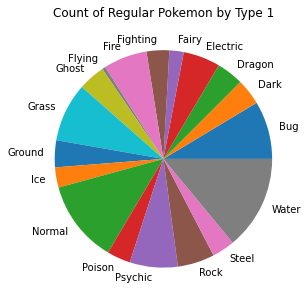

In [38]:
type1_counts = pokemon.groupby('Type 1').count()

# Pandas API
type1_counts.plot.pie(y='Number', legend=False, ylabel='', figsize=(5,5))
plt.title("Count of Regular Pokemon by Type 1")

# matplotlib API
# plt.figure(figsize=(5,5))
# plt.pie(x='Number', data=type1_counts, labels=type1_counts.index)
# plt.title("Count of Regular Pokemon by Type 1")


How can we plot more than one pie chart?  One way is to indicate the figure we are working on and then plot.

Text(0.5, 1.0, 'Legendary Pokemon by Type 1')

<Figure size 432x288 with 0 Axes>

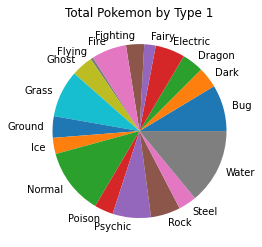

<Figure size 432x288 with 0 Axes>

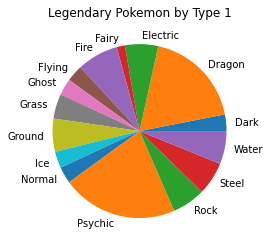

In [15]:
plt.figure()
type1_counts_legendary = pokemon.loc[pokemon.Legendary == True].groupby('Type 1').count()
plt.figure(0)
type1_counts.plot.pie(y='Number', legend=False, ylabel='')
plt.title("Total Pokemon by Type 1")
plt.figure(1)
type1_counts_legendary.plot.pie(y='Number', legend=False, ylabel='')
plt.title("Legendary Pokemon by Type 1")

If we want to align them side by side we can use subplots.

When we call `plt.subplots`, we specify the number of rows and columns.  It returns the figure containing the subplots, and two axes where we can graph.  By providing a tuple like this, the function expands it into the variables.

<AxesSubplot:title={'center':'Legendary Pokemon by Type 1'}>

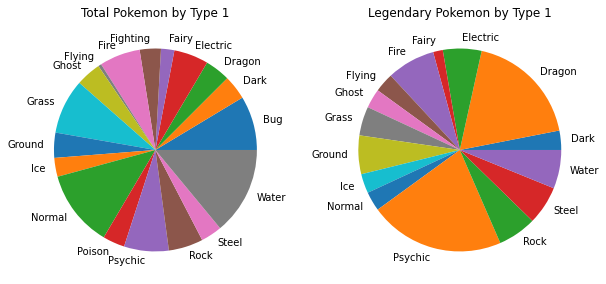

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
type1_counts.plot.pie(figsize=(10,10), y='Number', legend=False, ylabel='', ax=ax1, title="Total Pokemon by Type 1")
type1_counts_legendary.plot.pie(figsize=(10,10), y='Number', legend=False, ylabel='',ax=ax2, title="Legendary Pokemon by Type 1")

## Seaborn countplot

Another way to visualize pokemon types is using a bar chart.  We'll use a seaborn `countplot` which counts the number of observations of each type to create a bar graph.  See the documentation [here](https://seaborn.pydata.org/generated/seaborn.countplot.html)

Text(0.5, 1.0, 'Total Pokemon by Type 1')

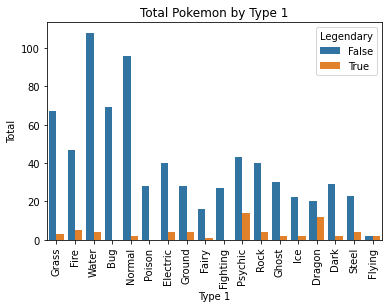

In [39]:
import seaborn as sns #data visualization
import matplotlib.pyplot as plt

ax = sns.countplot(x="Type 1", hue="Legendary", data=pokemon)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total')
plt.title("Total Pokemon by Type 1")

We can use this visualization to see type 2 pokemon as well:

Text(0.5, 1.0, 'Total Pokemon by Type 2')

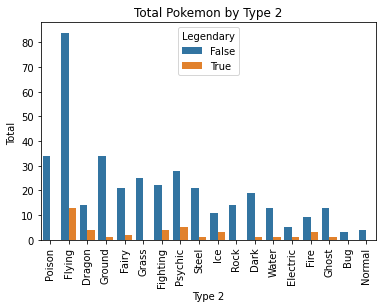

In [40]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=pokemon)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

Can you display Type 2 Pokemon as two pie charts as we did for Type 1?

What does this tell you?

* Water, normal, bug and grass are the most common type 1 and flying, ground and poison are the most common type 2.
* Team Rocket should have pokemon in their battle squads to counter these types!

# Using combat data

Now that we have a handle on the pokemon data, lets load up data on pokemon battles to understand which pokemon are the best, and gain an understanding of why.

In [41]:
combat = pd.read_csv("datasets/pokemon/combats.csv")
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


## Combat data analysis

In [42]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


We can see that the combat DataFrame has 3 columns, all integers.

The first column, `First_pokemon` is the first pokemon in the fight, `Second_pokemon` is the second, and `Winner` is the winner of the battle.

There are 50000 fights recorded - cool!  The index into the fights is a range of integers like before.

We can also get a quick look at the *shape* of our two tables like this:

In [43]:
print("Dimensions of Pokemon: " + str(pokemon.shape))
print("Dimensions of Combat: " + str(combat.shape))

Dimensions of Pokemon: (800, 12)
Dimensions of Combat: (50000, 3)


## Calculating win percentage

Lets calculate get the total wins for each pokemon.  To do this, we will count the number of unique values of the Winner column using the `value_counts()` method.  This counts the number of times a value appears in that column returning a Series.

In [21]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
total_Wins

163    152
438    136
154    136
428    134
314    133
      ... 
189      5
639      4
237      4
190      3
290      3
Name: Winner, Length: 783, dtype: int64

You can see that pokemon number 163 won 152 battles, pokemon 438 won 136 battles, etc..

There are a couple of things to note here.  Notice how we can access the Winner column using the dot notation `combat.Winner` in addition to the array syntax `combat['Winner']`.

Another thing to note is that `total_Wins` is a *Series*, not a DataFrame.  Remember that a Series is simply a series of data values.  If you think of a DataFrame as a table, a Series is a list, or really just a single column of a DataFrame.  A Series and a DataFrame are intimately related.  You can think of a DataFrame as a bunch of Series that are glued together, so when we get one column of a DataFrame like Winner, we get a series.

The `value_counts()` method gives us a series where the index comes from the Winner column, and the value is the count of the number of times that value appears in the column.

We can see that 783 different pokemon won at least one battle since there are 783 rows.

Lets see how many pokemon actually participated in *any* battle.  Maybe there are some that didn't win any battles?

First, we'll try to understand how many pokemon were actually participating as either a First_pokemon or a Second_pokemon.  To do this lets use the `groupby()` method.

This method will create a new DataFrame where the index is the First_pokemon, and the other columns are an *aggregate* of the others.  Different aggregate functions include `sum`, `mean` (average), or `count`.

Lets get the number of times a given pokemon that was in the First_pokemon column appears in the data.

In [47]:
# get the number of wins for each pokemon
countByFirst = combat.groupby('First_pokemon').count()
countByFirst

,Second_pokemon,Winner
First_pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50
...,...,...
796,49,49
797,64,64
798,60,60


What is going on here?

From this we can see that pokemon 1 participated as First_pokemon 70 times, 2 55 times, etc..

Lets do the same for the Second_pokemon.

In [48]:
countBySecond = combat.groupby('Second_pokemon').count()
countBySecond

,First_pokemon,Winner
Second_pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62
...,...,...
796,56,56
797,67,67
798,59,59


There are 784 total rows in the data, meaning that 784 different pokemon participated in combat as the Second_pokemon too.  Lets summarize this

In [24]:
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


## Fixing win data - missing Pokemon

So we know that there were 784 pokemon that played as both first and second, but we found that there were only 783 unique wins!  What happened?

It looks like there was one pokemon that never won a battle!  How can we figure out which one?

We can use the `numpy` library to get the difference between the two indexes of the `countByFirst` DataFrame and the `numberOfWins` Series.

Remember tht numpy is a Python library like Pandas that provides a very simple and powerful data structure - the n-dimensional array.  The Pandas library is built on top of Numpy.

Documentation for Numpy is at https://numpy.org/doc/

To get the set difference we can use the numpy [`setdiff1d` method](https://numpy.org/doc/1.20/reference/generated/numpy.setdiff1d.html) to get the difference between two one dimensional arrays (vectors).  For example:


In [25]:
import numpy as np

a = np.array([1,2,3,2,4,1])
b = np.array([3,4,5,6])

np.setdiff1d(a,b)


array([1, 2])

Lets get the values of the two indexes we are interested in, then find the set difference:

In [26]:
losing_pokemon_array= np.setdiff1d(countByFirst.index.values, total_Wins.index.values) #offset 
losing_pokemon_array

array([231])

Only one pokemon was in the countByFirst index, but not in the total_Wins idex.  Now we look up the row that has that pokemon number in it to find out which pokemon it is:

In [27]:
losing_pokemon = pokemon[pokemon['Number'] == losing_pokemon_array[0]] 
print(losing_pokemon.iloc[0])

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


Looks like Shuckle never wins a battle!

We want to be able to rate pokemon in terms of the number of wins, but it looks like we may have some missing pokemon if they never win.

Let's create a new DataSet called numberOfWins to calculate the percentage of time a given pokemon wins.  First, we'll use `groupby()`.

GroupBy creates a new DataSet where the index is the values of the column selected, and then all other columns are aggregated using a function like `sum()` or `count()`.  Lets count how many times the pokemon win.


In [44]:
numberOfWins = combat.groupby('Winner').count()
numberOfWins.sort_index()

,First_pokemon,Second_pokemon
Winner,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55
...,...,...
796,39,39
797,116,116
798,60,60


This shows how many times each pokemon won as either the first or second pokemon.  Note that the first and second columns are the same, since they are just a count as to how often these columns appear when the pokemon is the winner.  We can choose either to determine how often they won.  Lets add the missing pokemon that never won:

In [49]:
numberOfWins.loc[231] = [0, 0]
numberOfWins.loc[231]

First_pokemon     0
Second_pokemon    0
Name: 231, dtype: int64



Now we'll calculate the number of wins, and add that new column.

In [50]:
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner

Now we can calculate the Win Percentage!

In [51]:
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']
numberOfWins

,First_pokemon,Second_pokemon,Total Fights,Win Percentage
Winner,,,,
1,37,37,133,0.278195
2,46,46,121,0.380165
3,89,89,132,0.674242
4,70,70,125,0.560000
5,55,55,112,0.491071
...,...,...,...,...
797,116,116,131,0.885496
798,60,60,119,0.504202
799,89,89,144,0.618056


## Merging win percentage

Now lets merge this dataset with the pokemon dataframe like we did with movies.  This merge will keep the rows where there is a number in both tables.  

In [52]:
results = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
del results['First_pokemon']    # drop these columns, we don't want them
del results['Second_pokemon']
results

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,133,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,121,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,132,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,125,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,112,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,105,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,131,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,119,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,144,0.618056


While this is good, it only keeps the pokemons that are in both tables.   We also want to know which pokemon were not in any battles.  To do this we can use the merge parameter `how='left'` meaning we want to merge keeping all of the indexes in the left table (pokemon).

In [53]:
merged_results = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')
del merged_results['First_pokemon']
del merged_results['Second_pokemon']
merged_results

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,144.0,0.618056


Using this dataframe we can now check to see if there are some pokemon that weren't in any battles by filtering all rows out except those where `Win Percentage` is null like this:

In [54]:
merged_results.loc[merged_results['Win Percentage'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN
321,322,Hariyama,Fighting,NaN,144,120,60,40,60,50,3,False,NaN,NaN


Lets change the Total Fights values to 0 rather than null so we can filter on that.  It also makes sense since they didn't fight, so the number of fights is zero.

In [55]:
merged_results.loc[merged_results['Total Fights'].isnull(),'Total Fights'] = 0
merged_results

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,144.0,0.618056


Now, lets get a list of the worst pokemon in terms of win percentage for those that fought.  Shuckle is at the bottom as expected!

In [56]:
merged_results[merged_results['Total Fights']>0].sort_values(by = ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Fights,Win Percentage
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,135.0,0.000000
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,133.0,0.052632


We can check the best ones too.

In [57]:
merged_results[merged_results['Total Fights']>0].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,120.0,0.950000


Lets look at what type of pokemon are the best (win the most)

In [58]:
merged_results.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Bug,0.432550
Poison,0.433262
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


## Visualization of win percentage

Challenge - What's the best way to visualize this?

The Pokemon type that win the most are flying, dragon, electric and dark. The Pokemon type that win the least are fairy, rock, steel, poison.

While this seems straightforward given that we have looked at the data, it might not always be apparent to those who have not.  We can tell the company, you should spend more money on flying, dragon, electric and dark pokemon, and not fairy, rock, steel, poison.

# Visualizing Correlation

Lets see how the different pokemon properties correlate to wins.  If we can figure that out, we can decide on what Pokemon we want to capture.

Correlation definition: 

https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/

Correlation coefficients are calculated to show how strong a relationship is between data.  When it is close to 1 it means positive relationship, -1, negative, and close to 0 means none.   

![Correlation](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

In [59]:
col = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
corrMatrix = merged_results.loc[:,col].corr()
corrMatrix

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.261602
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.502825
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.114565
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.481445
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.302422
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.938055
Win Percentage,0.261602,0.502825,0.114565,0.481445,0.302422,0.938055,1.000000


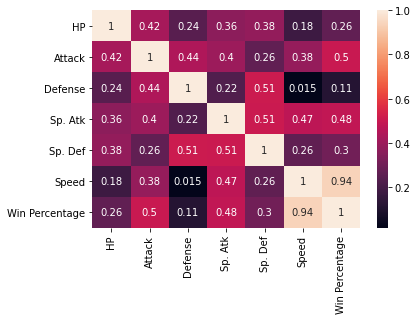

In [60]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

Looks like Speed is the main factor, then Attack?  Lets use a scatter plots to see some of the relationships more clearly.

<AxesSubplot:xlabel='Attack', ylabel='Win Percentage'>

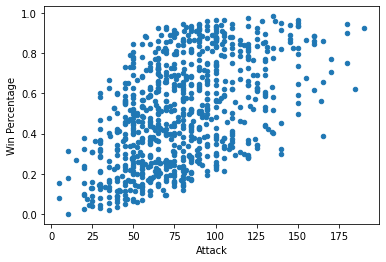

In [61]:
merged_results.plot.scatter(x="Attack", y="Win Percentage")

Definitely doesn't look like there's a strong relationship.  Sometimes when attack is pretty low, win percentage can be high.

<AxesSubplot:xlabel='Speed', ylabel='Win Percentage'>

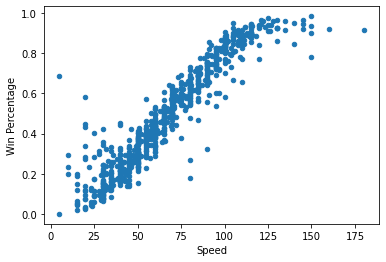

In [62]:
merged_results.plot.scatter(x="Speed", y="Win Percentage")

This looks like a nice clear line.  Lets look at all of the factors together to see if we can spot relationships.  To do this seaborn has an awesome visualization called a pairplot.

Here's how we can use it.

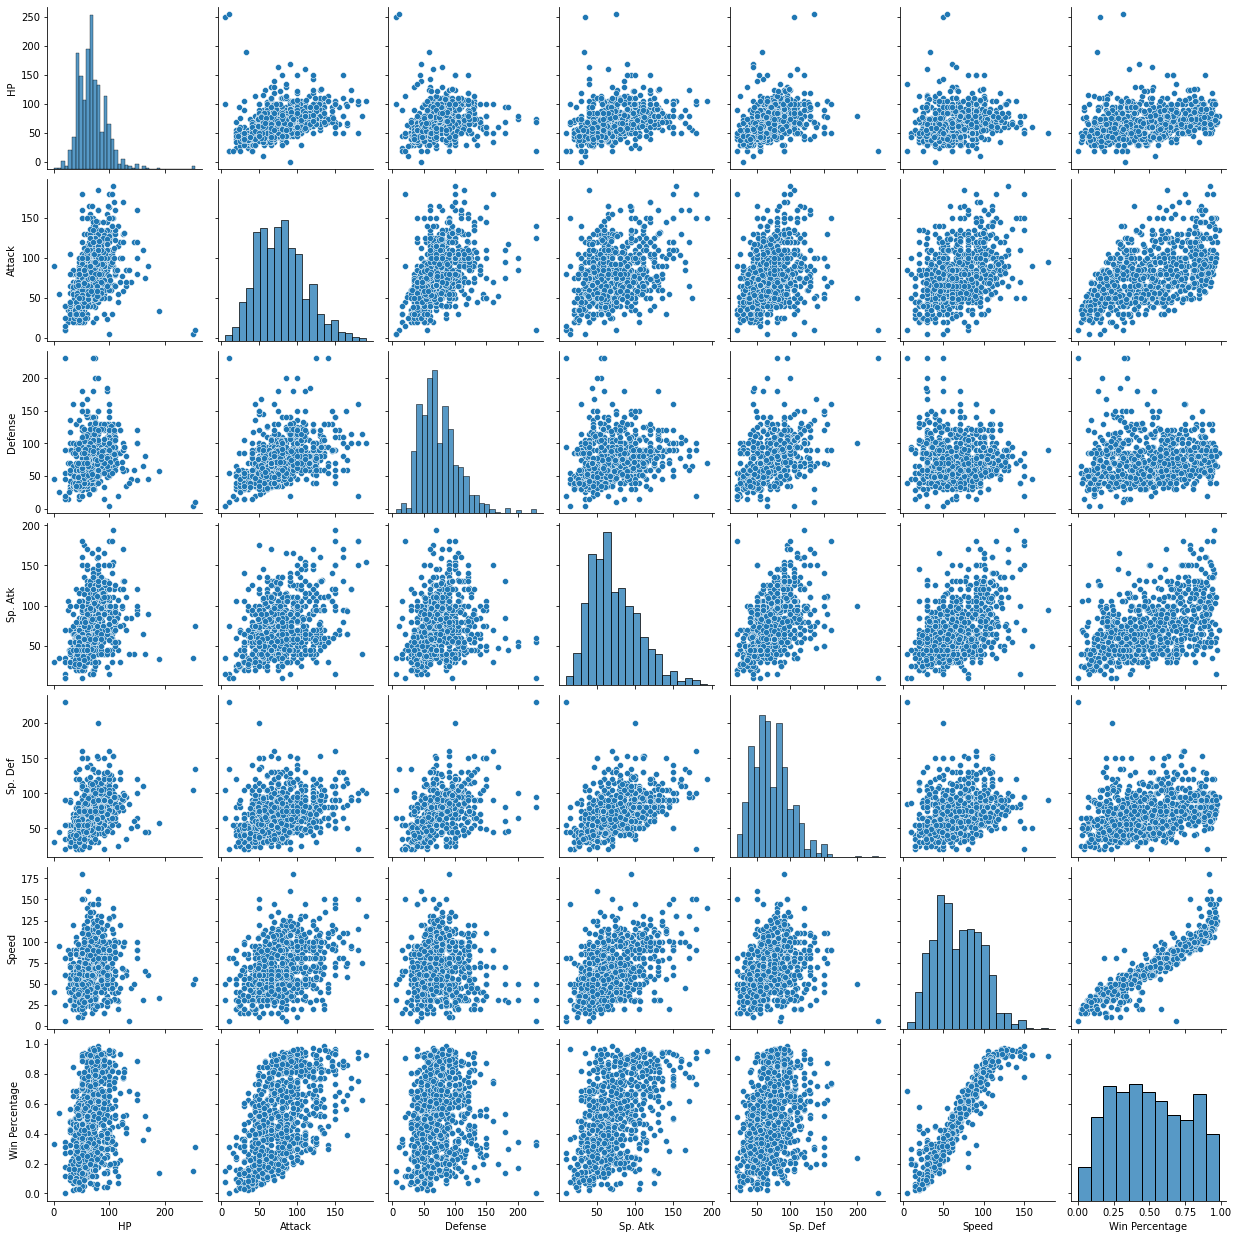

In [63]:
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
sns.pairplot(merged_results.loc[:,col])

Very cool, we can see where there are relationships between the different characteristics.  Not much going on except for Speed and Win Percentage.  

Seaborn has another visualization called a regplot.  This is a scatter plot with a line fitted to the data so that we can start to make predicitions.  Here's how to make one.

Text(0.5, 1.0, 'Speed vs Win Percentage')

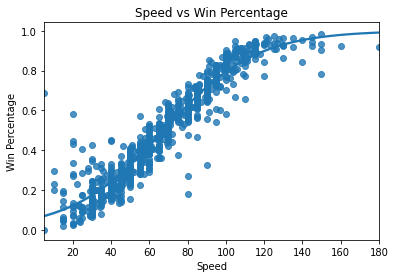

In [74]:
sns.regplot(x="Speed", y="Win Percentage", data=merged_results, logistic=True).set_title("Speed vs Win Percentage")


Here we're using a logistic regression line which is a model used to predict logical outcome (e.g. win or lose) based on a variable. We can see that if we have a speed that is say 150, we will have a win percentage that is high!

Another seaborn plot called the `lmplot` can plot different regression lines for different categories.  To do this we use the hue property.

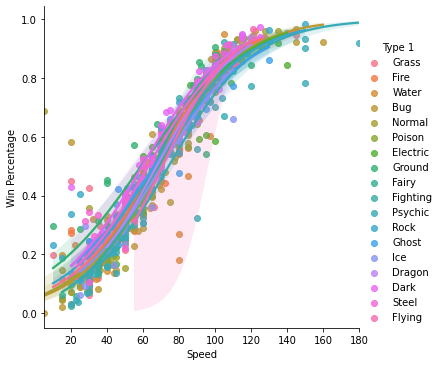

In [72]:
sns.lmplot(x="Speed", y="Win Percentage", data=merged_results, hue = 'Type 1',logistic=True)#.set_title("Speed vs Win Percentage")

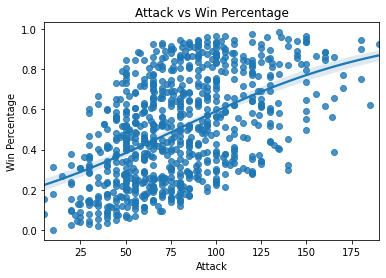

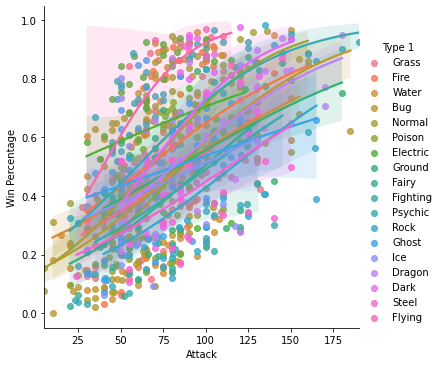

In [76]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=merged_results, logistic=True).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=merged_results, hue = 'Type 1', logistic=True)

Why did we plot the same figure twice? The top plot with one solid color was to look at the relationship between the independent and dependent variable as a whole. Breaking down the data further, it was subset by 'type 1' in hopes that a new pattern would appear. I was thinking maybe we would see dragon type pokemon clustered at the higher end of win percentage, but I didn't.

What did we learn?

1. Water, normal, bug and grass are the most common type 1 and flying, ground and poison are the most common type 2.  We should have pokemon on hand that can effectively counter these common types.
1. The Pokemon type that win the most are flying, dragon, electric and dark. The Pokemon type that win the least are fairy, rock, steel, poison.  We should invest in the top pokemon!
1. Speed and Attack!!

These are the most important factors to win.

# Challenges

What are the to 10 strongest pokemon by summing their stats?

How would you create a visualization of a distribution of the various attack values of pokemon.
> Hint: use `plt.hist()` method on attack values)

How can you compare the attack vs defence values of fire vs. water pokemon types?
> Hint: filter out only fire and water types in different dataframes, then create two scatter plots on top of each other.

